C:\Users\Ренат\AppData\Local\Temp\ipykernel_1088\3675644378.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv("flights.csv")



=== Средняя задержка по авиакомпаниям (AIRLINE) ===
AIRLINE
NK    15.944766
UA    14.435441
F9    13.350858
B6    11.514353
WN    10.581986
MQ    10.125188
VX     9.022595
AA     8.900856
EV     8.715934
OO     7.801104
Name: DEPARTURE_DELAY, dtype: float64


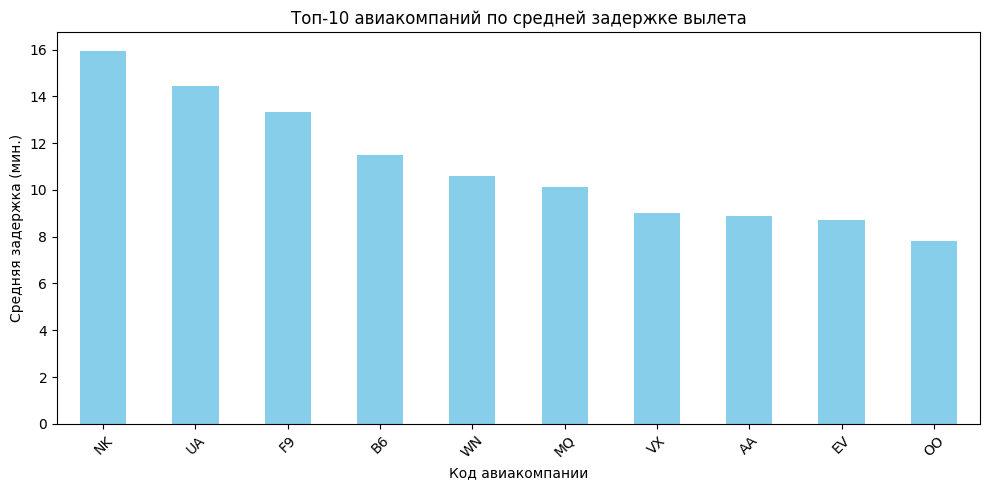


=== Средняя задержка по аэропортам (ORIGIN_AIRPORT) ===
ORIGIN_AIRPORT
14960    133.666667
14222    100.875000
11587     81.666667
13256     56.307692
12206     56.200000
12177     48.666667
10581     43.500000
11973     42.533333
10423     42.036697
12896     41.750000
Name: DEPARTURE_DELAY, dtype: float64


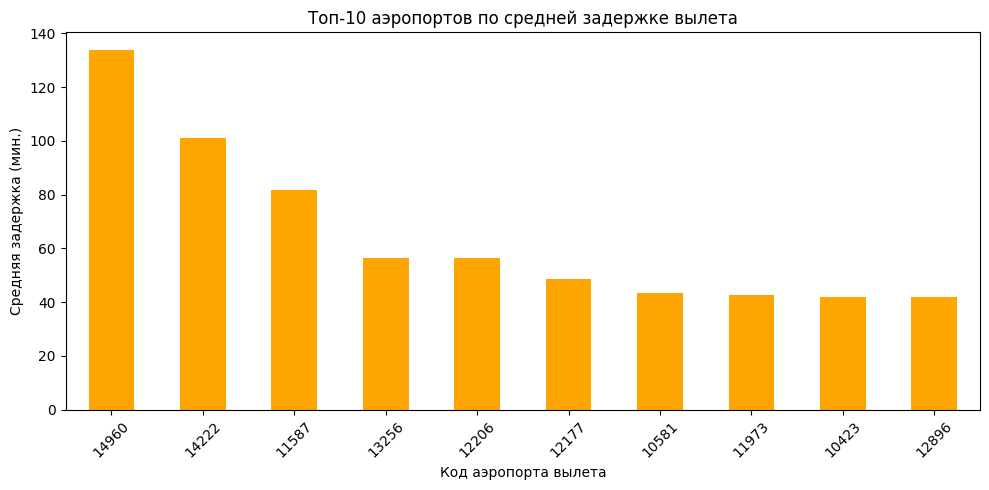


=== Средняя задержка по дням недели ===
DAY_OF_WEEK
1    10.871775
4     9.956913
5     9.429768
7     9.402856
2     9.164522
3     8.645277
6     7.827416
Name: DEPARTURE_DELAY, dtype: float64


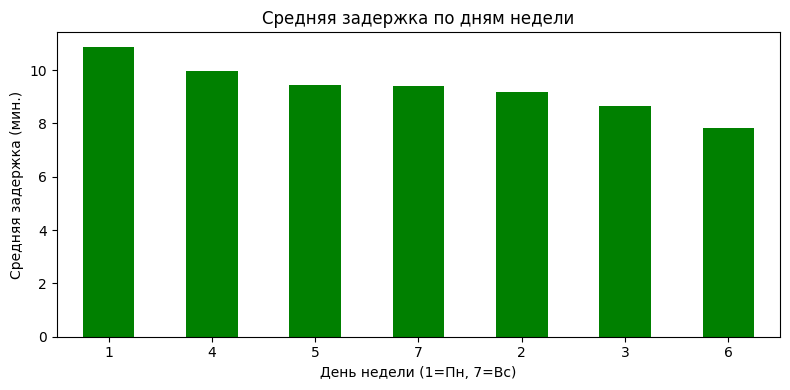


=== Средняя задержка по месяцам ===
MONTH
6     13.986016
2     11.885284
12    11.783529
7     11.394664
8      9.932045
1      9.759471
3      9.660903
5      9.454144
4      7.721885
11     6.944197
10     4.982661
9      4.823560
Name: DEPARTURE_DELAY, dtype: float64


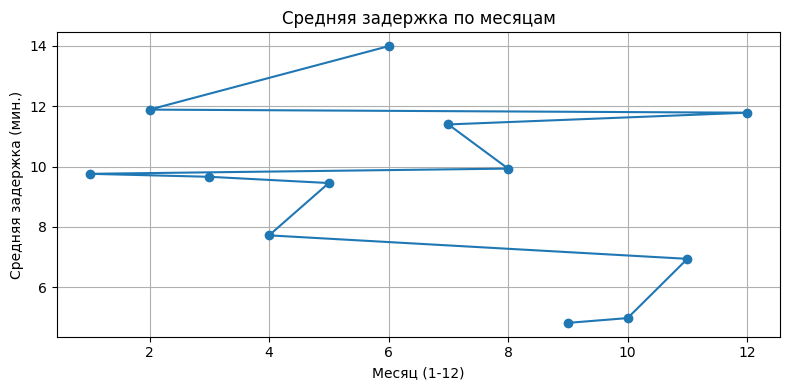


=== Средняя задержка по часу вылета ===
DEP_HOUR
20    15.292740
19    15.075731
18    14.989270
17    13.836957
21    13.715801
16    12.931783
15    11.941296
22    11.771036
14    11.178353
4     10.335227
13     9.796986
23     9.518519
12     8.953613
3      8.917862
1      8.086939
11     7.783086
2      7.266955
0      7.199849
10     6.894669
9      5.677080
8      4.685878
7      3.252010
6      2.106578
5      1.897017
Name: DEPARTURE_DELAY, dtype: float64


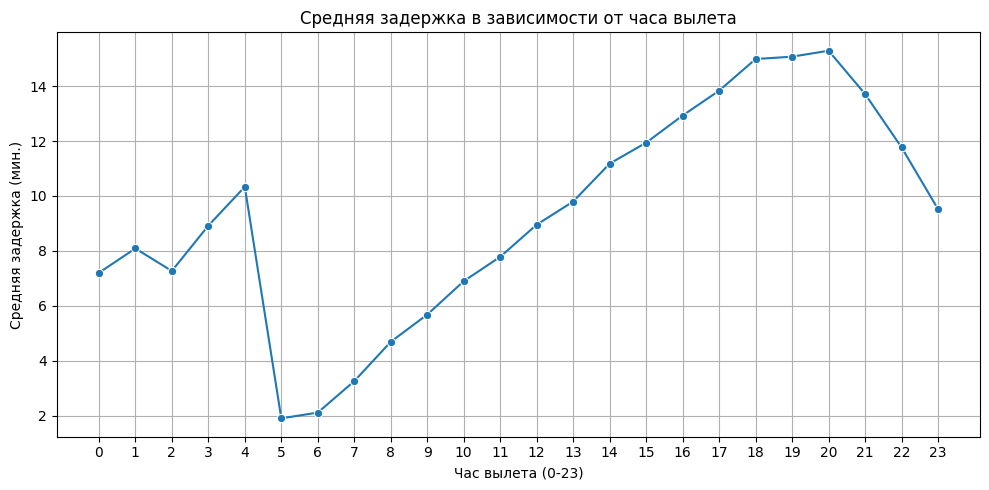


=== КРАТКИЕ ВЫВОДЫ ===
1. Видим, какие авиакомпании и аэропорты имеют наибольшие задержки (см. Топ-10).
2. Анализируем задержки по дням недели, месяцам, часу вылета (см. графики).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flights_df = pd.read_csv("flights.csv")

#print("Колонки в flights_df:")
#for col in flights_df.columns:
#    print(repr(col))

airline_delays = flights_df.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)

print("\n=== Средняя задержка по авиакомпаниям (AIRLINE) ===")
print(airline_delays.head(10))  # Покажем Топ-10

plt.figure(figsize=(10, 5))
airline_delays.head(10).plot(kind='bar', color='skyblue')
plt.title("Топ-10 авиакомпаний по средней задержке вылета")
plt.xlabel("Код авиакомпании")
plt.ylabel("Средняя задержка (мин.)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

airport_delays = flights_df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)

print("\n=== Средняя задержка по аэропортам (ORIGIN_AIRPORT) ===")
print(airport_delays.head(10))

plt.figure(figsize=(10, 5))
airport_delays.head(10).plot(kind='bar', color='orange')
plt.title("Топ-10 аэропортов по средней задержке вылета")
plt.xlabel("Код аэропорта вылета")
plt.ylabel("Средняя задержка (мин.)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

if 'DAY_OF_WEEK' in flights_df.columns:
    dow_delays = flights_df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)
    print("\n=== Средняя задержка по дням недели ===")
    print(dow_delays)

    plt.figure(figsize=(8, 4))
    dow_delays.plot(kind='bar', color='green')
    plt.title("Средняя задержка по дням недели")
    plt.xlabel("День недели (1=Пн, 7=Вс)")
    plt.ylabel("Средняя задержка (мин.)")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("\n[Нет столбца 'DAY_OF_WEEK' в данных — пропускаем этот шаг.]")

if 'MONTH' in flights_df.columns:
    month_delays = flights_df.groupby('MONTH')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)
    print("\n=== Средняя задержка по месяцам ===")
    print(month_delays)

    plt.figure(figsize=(8, 4))
    month_delays.plot(kind='line', marker='o')
    plt.title("Средняя задержка по месяцам")
    plt.xlabel("Месяц (1-12)")
    plt.ylabel("Средняя задержка (мин.)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n[Нет столбца 'MONTH' в данных — пропускаем этот шаг.]")

if 'SCHEDULED_DEPARTURE' in flights_df.columns:
    flights_df['SCHEDULED_DEPARTURE'] = flights_df['SCHEDULED_DEPARTURE'].fillna(0).astype(int)
    flights_df['DEP_HOUR'] = flights_df['SCHEDULED_DEPARTURE'] // 100

    hour_delays = flights_df.groupby('DEP_HOUR')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)
    print("\n=== Средняя задержка по часу вылета ===")
    print(hour_delays.head(24))  # Всего 24 часа

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=hour_delays.index, y=hour_delays.values, marker='o')
    plt.title("Средняя задержка в зависимости от часа вылета")
    plt.xlabel("Час вылета (0-23)")
    plt.ylabel("Средняя задержка (мин.)")
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n=== КРАТКИЕ ВЫВОДЫ ===")
print("1. Видим, какие авиакомпании и аэропорты имеют наибольшие задержки (см. Топ-10).")
print("2. Анализируем задержки по дням недели, месяцам, часу вылета (см. графики).")
